#### 1. Read the dataset

    1.1. Plotting a time series
    
#### 2. Y1

    2.1. Plotting a time series
    2.2. IDENTIFICATION PROCESS, ACF and PACF of the time series 
    2.3. ARIMA MODEL, Fit model with estimated order
    2.4. ANALYZE MODEL, Plot residual error
    2.5. Predict past and future values
    
#### 3. Y2,Y3,Y4,Y5,Y6
    

# LabPractice 4.2: Forecasting II

For this practice, you will need the following datasets:
- **ARMA_series.xlsx**: synthetic dataset with 6 timeseries to practice ARMA model training.

The main package for time series analysis in Python is **statsmodels**.

Further reading:
- [statsmodels](https://www.statsmodels.org/stable/index.html)

In addition, we will be using the following libraries:
- Data management
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)

- Plotting
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)

- Others
    - MLTools

In [31]:
# For more information, check https://www.machinelearningplus.com/time-series/time-series-analysis-python/ 
### Load libraries ###
# interactive plotting
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set()

#Define figure sizes
plt.rcParams.update({'figure.figsize': (8, 5), 'figure.dpi': 120})

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from dateutil.parser import parse 

# Machine Learning libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Others
import math
from mltools import forecast_tools as FT

---
## 1. Read the dataset

In [32]:
# Import data
df = pd.read_csv('ARMA_series.csv',sep=";")
df.head()

,y1,y2,y3,y4,y5,y6
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.153085,-0.716578,-1.714427,0.000000,1.672241,-0.491550
2,-0.407418,-0.388769,0.065251,1.450110,-0.256682,1.600353
3,0.038315,0.393303,0.508671,1.845359,-0.099479,-0.524670
4,-0.055686,-1.399870,-0.237498,4.164812,-1.090444,0.319794


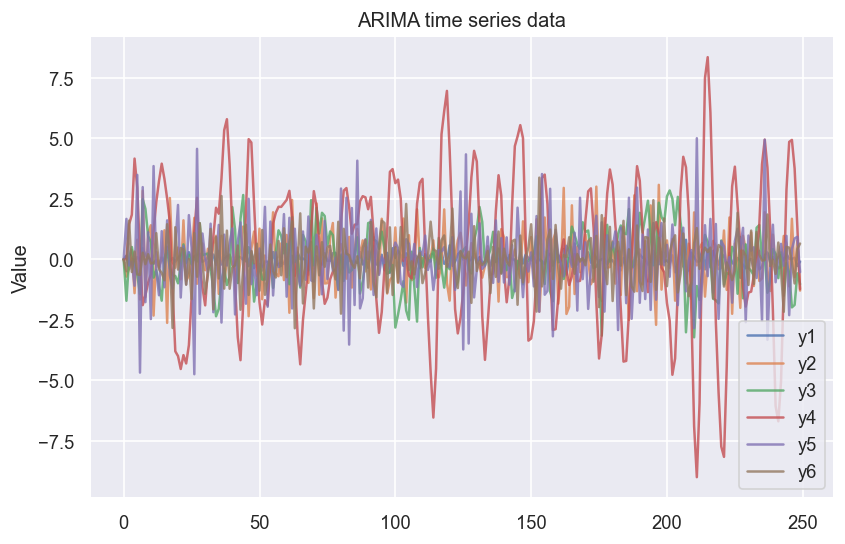

In [33]:
# Plotting a time series
fig, ax = plt.subplots()
for col in df.columns.values.tolist():
    ax.plot(col, data=df, label=col, alpha=0.8)
ax.set(title='ARIMA time series data', ylabel='Value')
plt.legend()
plt.show()

# Y1

In [34]:
df_ts1 = df[['y1']] # Maintain data.frame format for column
df_ts1

,y1
0,0.000000
1,0.153085
2,-0.407418
3,0.038315
4,-0.055686
...,...
245,0.020973
246,0.022484
247,0.058784
248,-0.275104


<AxesSubplot:>

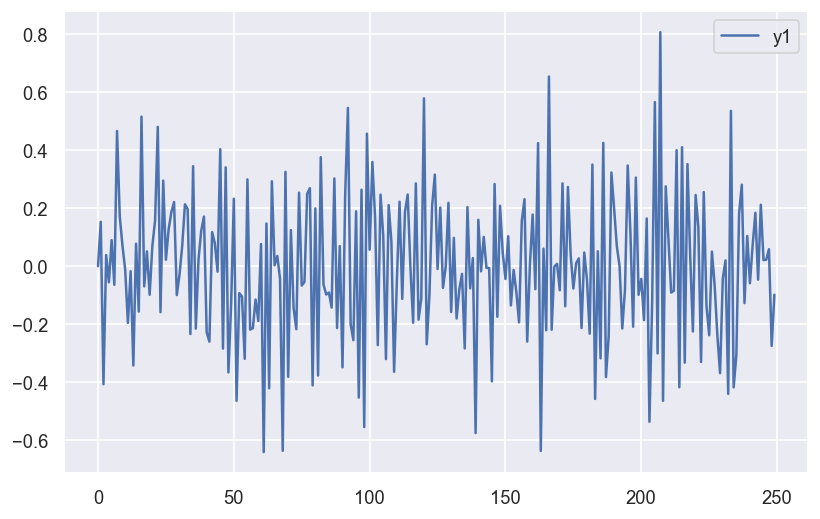

In [35]:
# Plotting a time series
sns.lineplot(data=df_ts1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


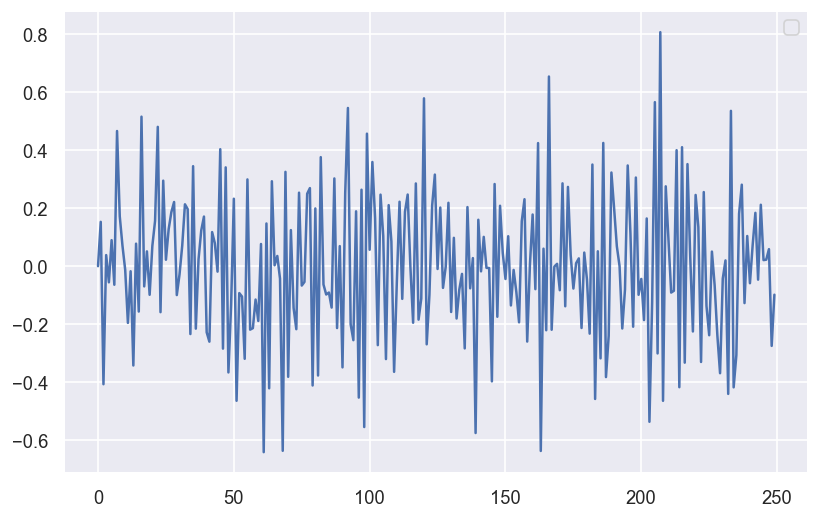

In [36]:
# Plotting a time series
plt.figure()
plt.plot(df_ts1)
ax.set(title='ARIMA time series data', ylabel='Value')
plt.legend()
plt.show()

---
### Identification process

/usr/local/Caskroom/miniforge/base/envs/fmad/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


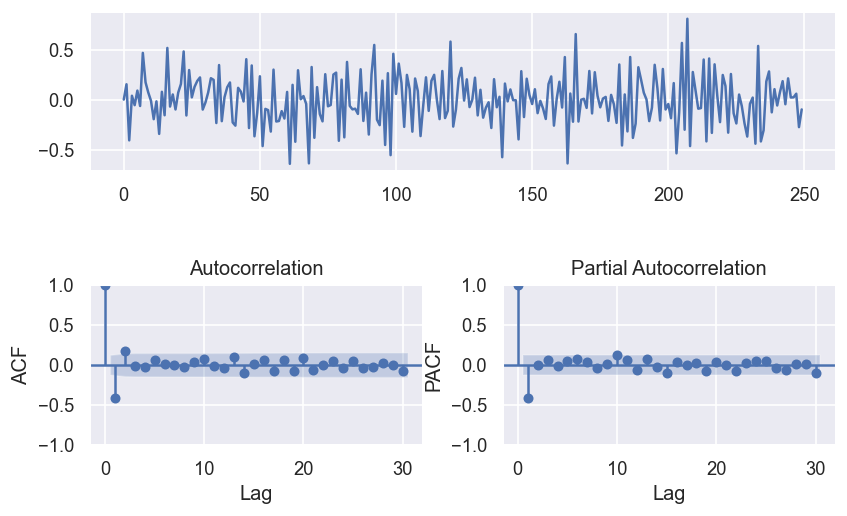

In [37]:
# ACF and PACF of the time series -> identify significant lags and order
FT.ts_display(df_ts1, lags=30)

---
### ARMA model

+ El AIC tiene en cuenta tanto el ajuste del modelo a los datos como la complejidad del modelo, por lo que un modelo con un valor AIC más bajo habrá encontrado un buen equilibrio entre ambos factores.

In [87]:
# Fit model with estimated order (trend="n", para quitar la constante)
arima_fit1 = ARIMA(df_ts1, order=(1,0,0), trend="c").fit() #order=(p,d,q)
print(arima_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                     y1   No. Observations:                  250
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   9.991
Date:                Fri, 09 Dec 2022   AIC                            -13.983
Time:                        17:29:17   BIC                             -3.418
Sample:                             0   HQIC                            -9.731
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.010     -0.176      0.860      -0.022       0.019
ar.L1         -0.4173      0.062     -6.736      0.000      -0.539      -0.296
sigma2         0.0540      0.005     11.334      0.0

#### Analyze model

+ La observación de los residuos de un modelo SARIMA puede ser una buena manera de evaluar si el modelo se ajusta bien a los datos. Si los residuos están cercanos a cero, esto suele indicar que el modelo ha capturado la mayor parte de la variabilidad en los datos y ha dejado poco ruido o residuo. Esto puede ser una señal de que el modelo es bueno.
+ Es importante tener en cuenta que la distribución de los residuos también debe ser examinada, ya que se espera que los residuos sigan una distribución normal.

/usr/local/Caskroom/miniforge/base/envs/fmad/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Ljung-Box test of residuals:
      lb_stat  lb_pvalue
25  15.257233   0.935162


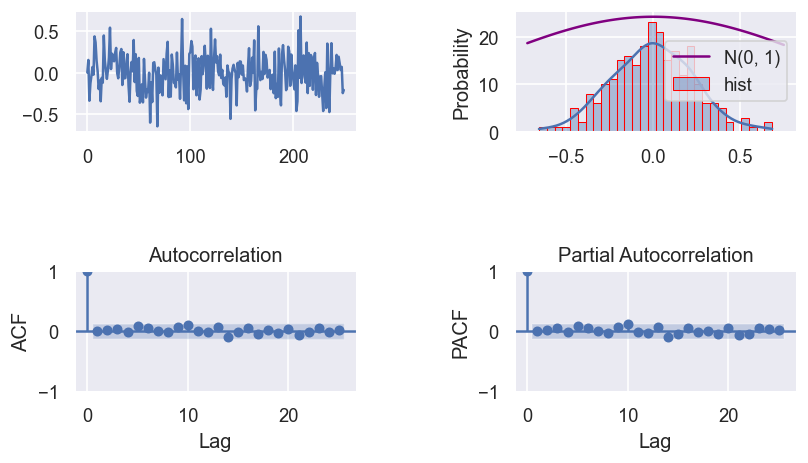

In [39]:
# Plot residual error
FT.check_residuals(pd.DataFrame(arima_fit1.resid))

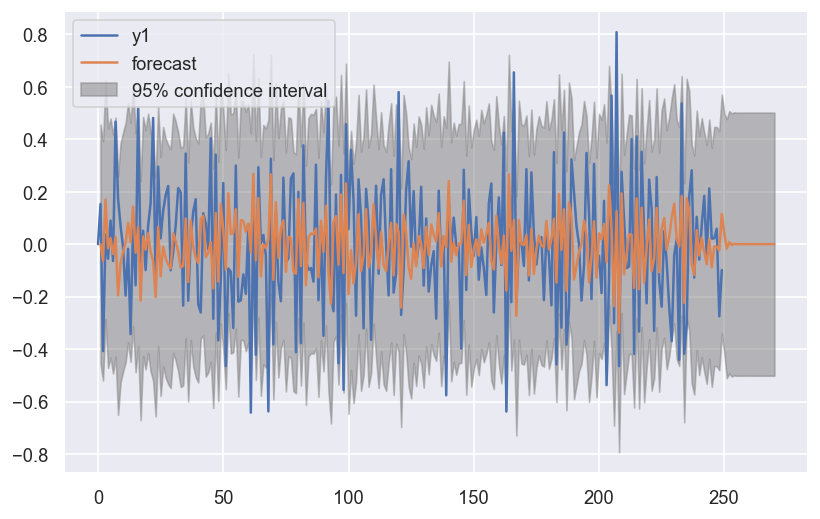

In [40]:
# Predict past and future values
horizon = 20
fig, ax = plt.subplots()
ax = df_ts1.loc[0:].plot(ax=ax)
fig = plot_predict(arima_fit1, 1, df_ts1.shape[0] + horizon, 
                    dynamic=False, ax=ax,
                    plot_insample=False)
plt.show()

# Y2

In [41]:
df_ts2 = df[['y2']] # Maintain data.frame format for column
df_ts2

,y2
0,0.000000
1,-0.716578
2,-0.388769
3,0.393303
4,-1.399870
...,...
245,-1.118337
246,1.676900
247,-0.739060
248,0.779423


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


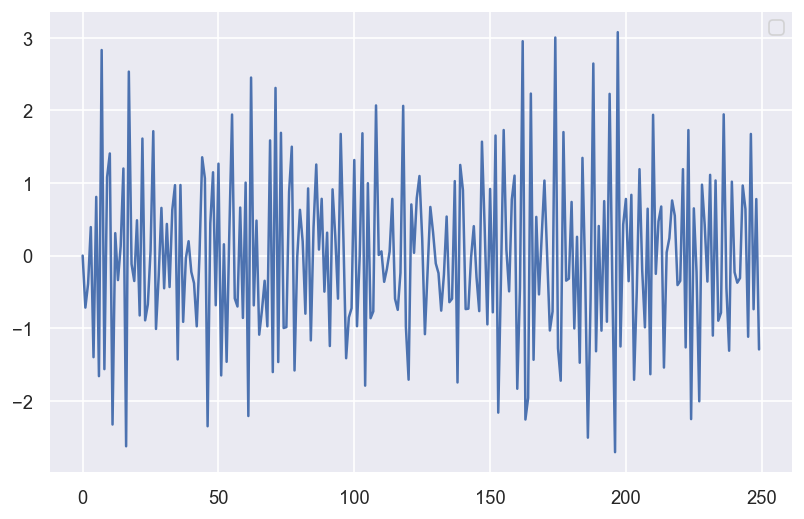

In [42]:
# Plotting a time series
plt.figure()
plt.plot(df_ts2)
ax.set(title='ARIMA time series data', ylabel='Value')
plt.legend()
plt.show()

/usr/local/Caskroom/miniforge/base/envs/fmad/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


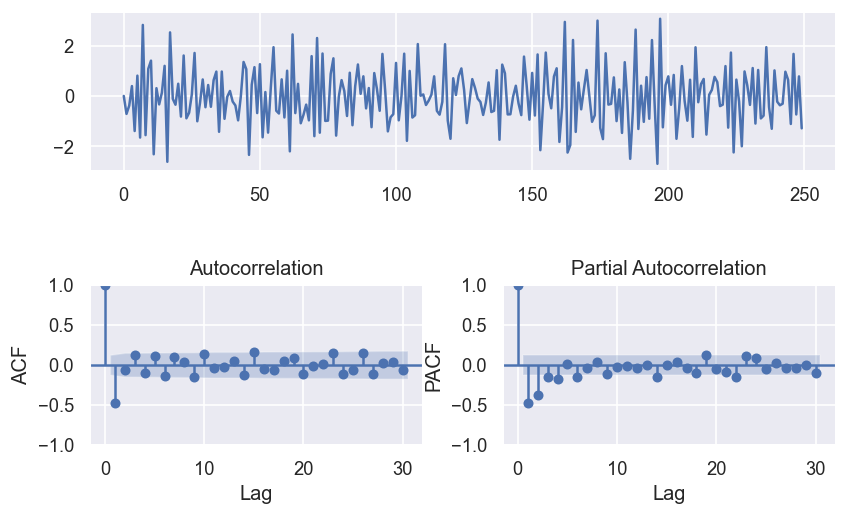

In [43]:
# ACF and PACF of the time series -> identify significant lags and order
FT.ts_display(df_ts2, lags=30)

In [50]:
# Fit model with estimated order
arima_fit2 = ARIMA(df_ts2, order=(0,0,1), trend="t").fit() #order=(p,d,q)
print(arima_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:                     y2   No. Observations:                  250
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -336.089
Date:                Fri, 09 Dec 2022   AIC                            678.178
Time:                        17:24:02   BIC                            688.742
Sample:                             0   HQIC                           682.430
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5.933e-05      0.000     -0.520      0.603      -0.000       0.000
ma.L1         -0.7218      0.045    -16.108      0.000      -0.810      -0.634
sigma2         0.8512      0.082     10.378      0.0

/usr/local/Caskroom/miniforge/base/envs/fmad/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Ljung-Box test of residuals:
      lb_stat  lb_pvalue
25  37.671688   0.049787


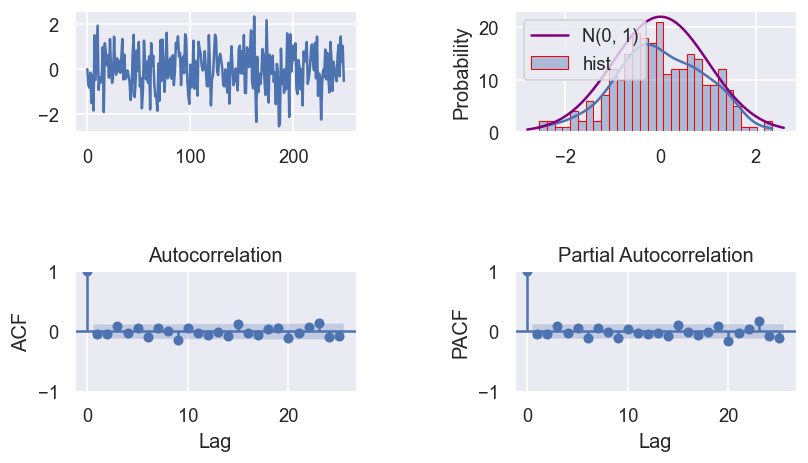

In [51]:
# Plot residual error
FT.check_residuals(pd.DataFrame(arima_fit2.resid))

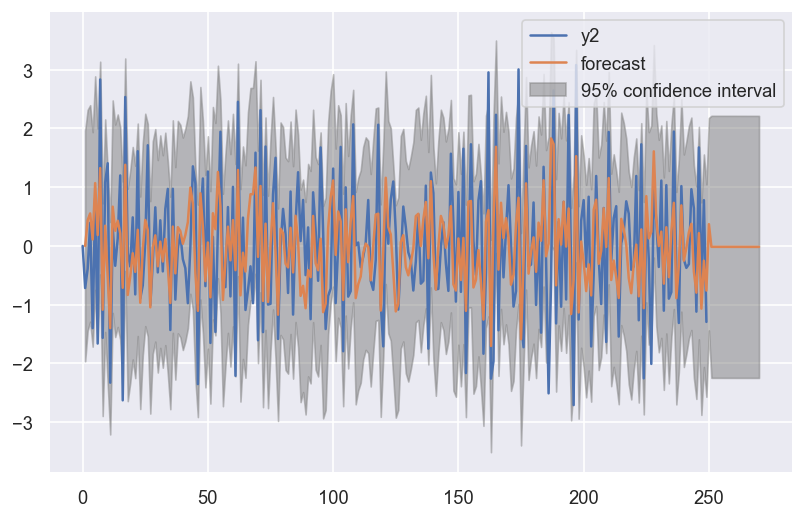

In [52]:
# Predict past and future values
horizon = 20
fig, ax = plt.subplots()
ax = df_ts2.loc[0:].plot(ax=ax)
fig = plot_predict(arima_fit2, 1, df_ts2.shape[0] + horizon, 
                    dynamic=False, ax=ax,
                    plot_insample=False)
plt.show()

# Y3

In [53]:
df_ts3 = df[['y3']] # Maintain data.frame format for column
df_ts3

,y3
0,0.000000
1,-1.714427
2,0.065251
3,0.508671
4,-0.237498
...,...
245,-0.558332
246,-1.987523
247,-1.885436
248,-0.579280


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


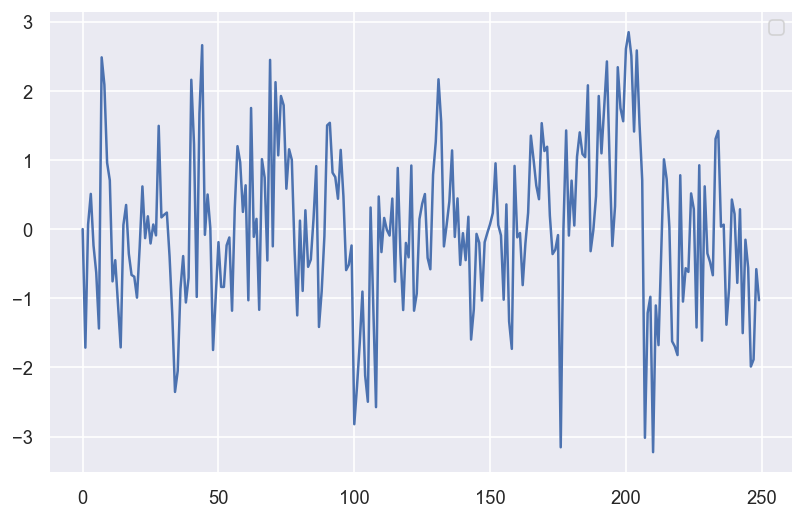

In [54]:
# Plotting a time series
plt.figure()
plt.plot(df_ts3)
ax.set(title='ARIMA time series data', ylabel='Value')
plt.legend()
plt.show()

/usr/local/Caskroom/miniforge/base/envs/fmad/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


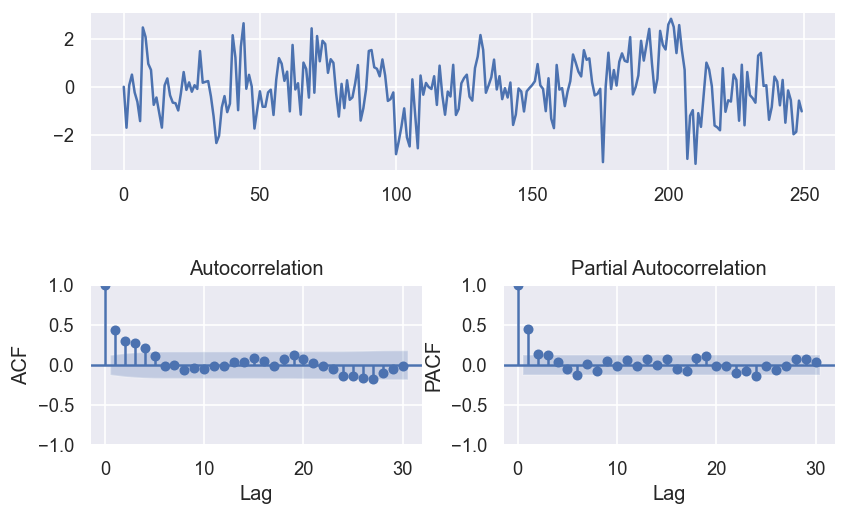

In [55]:
# ACF and PACF of the time series -> identify significant lags and order
FT.ts_display(df_ts3, lags=30)

In [74]:
# Fit model with estimated order
arima_fit3 = ARIMA(df_ts3, order=(0,0,3), trend="n").fit() #order=(p,d,q)
print(arima_fit3.summary())

                               SARIMAX Results                                
Dep. Variable:                     y3   No. Observations:                  250
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -363.685
Date:                Fri, 09 Dec 2022   AIC                            735.369
Time:                        17:27:36   BIC                            749.455
Sample:                             0   HQIC                           741.039
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3518      0.066      5.338      0.000       0.223       0.481
ma.L2          0.1731      0.074      2.354      0.019       0.029       0.317
ma.L3          0.1786      0.057      3.126      0.0

/usr/local/Caskroom/miniforge/base/envs/fmad/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Ljung-Box test of residuals:
      lb_stat  lb_pvalue
25  26.824513   0.364708


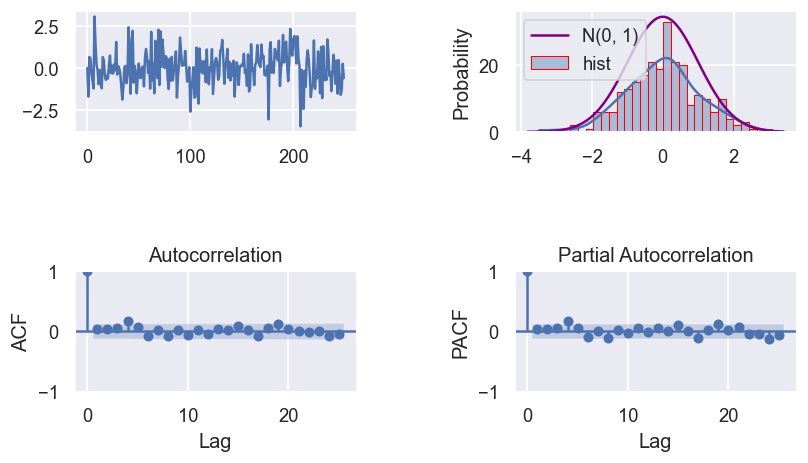

In [75]:
# Plot residual error
FT.check_residuals(pd.DataFrame(arima_fit3.resid))

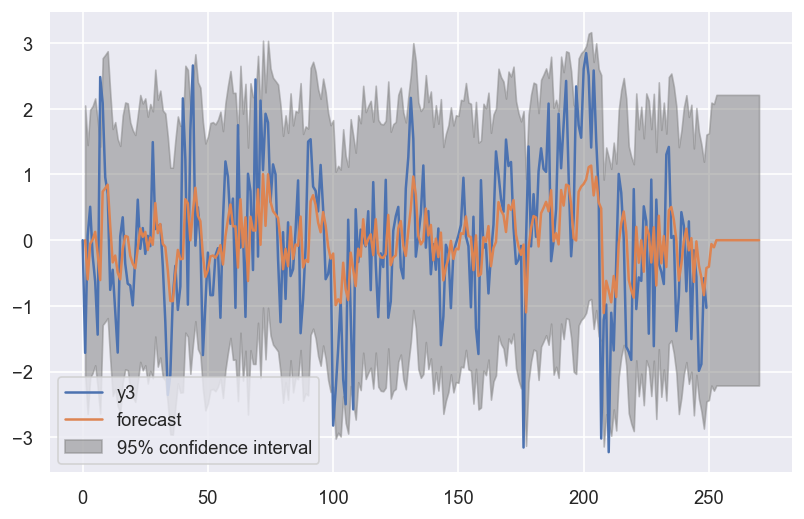

In [76]:
# Predict past and future values
horizon = 20
fig, ax = plt.subplots()
ax = df_ts3.loc[0:].plot(ax=ax)
fig = plot_predict(arima_fit3, 1, df_ts3.shape[0] + horizon, 
                    dynamic=False, ax=ax,
                    plot_insample=False)
plt.show()

# Y4

In [94]:
df_ts4 = df[['y4']] # Maintain data.frame format for column
df_ts4

,y4
0,0.000000
1,0.000000
2,1.450110
3,1.845359
4,4.164812
...,...
245,4.854977
246,4.937111
247,3.754496
248,1.341829


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


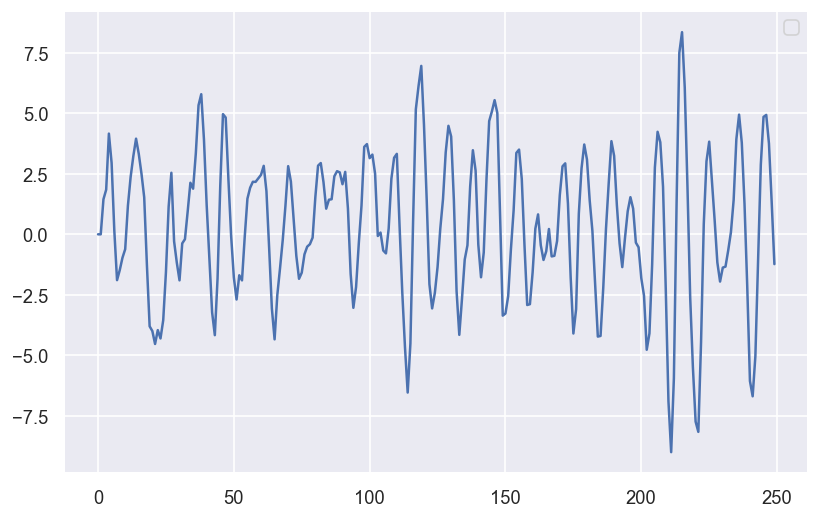

In [95]:
# Plotting a time series
plt.figure()
plt.plot(df_ts4)
ax.set(title='ARIMA time series data', ylabel='Value')
plt.legend()
plt.show()

/usr/local/Caskroom/miniforge/base/envs/fmad/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


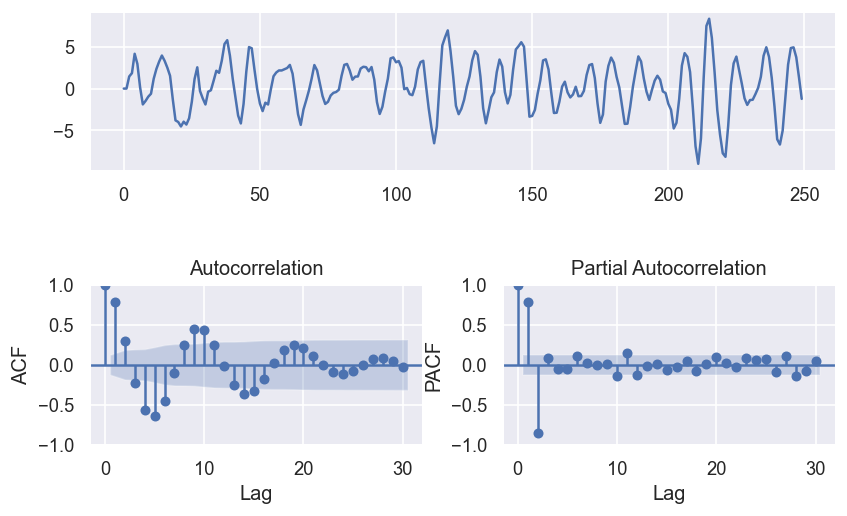

In [96]:
# ACF and PACF of the time series -> identify significant lags and order
FT.ts_display(df_ts4, lags=30)

In [101]:
# Fit model with estimated order
arima_fit4 = ARIMA(df_ts4, order=(2,0,0), trend="c").fit() #order=(p,d,q)
print(arima_fit4.summary())

                               SARIMAX Results                                
Dep. Variable:                     y4   No. Observations:                  250
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -355.391
Date:                Fri, 09 Dec 2022   AIC                            718.782
Time:                        17:34:30   BIC                            732.868
Sample:                             0   HQIC                           724.451
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3143      0.162      1.942      0.052      -0.003       0.632
ar.L1          1.4476      0.033     44.104      0.000       1.383       1.512
ar.L2         -0.8405      0.034    -24.575      0.0

/usr/local/Caskroom/miniforge/base/envs/fmad/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Ljung-Box test of residuals:
      lb_stat  lb_pvalue
25  22.546308   0.604037


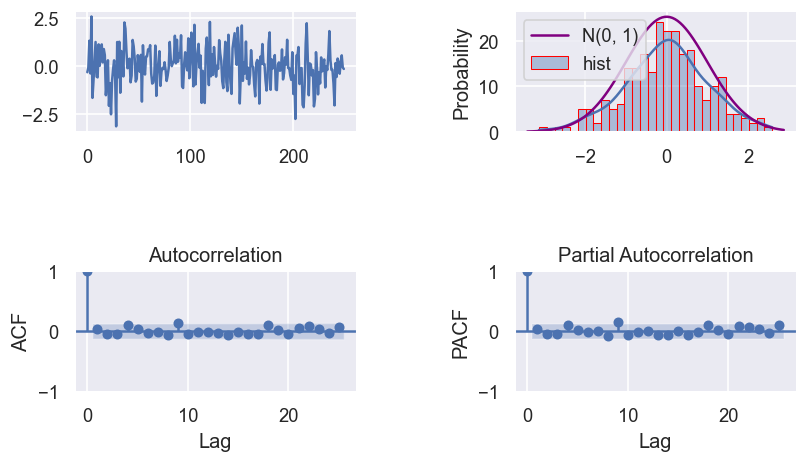

In [102]:
# Plot residual error
FT.check_residuals(pd.DataFrame(arima_fit4.resid))

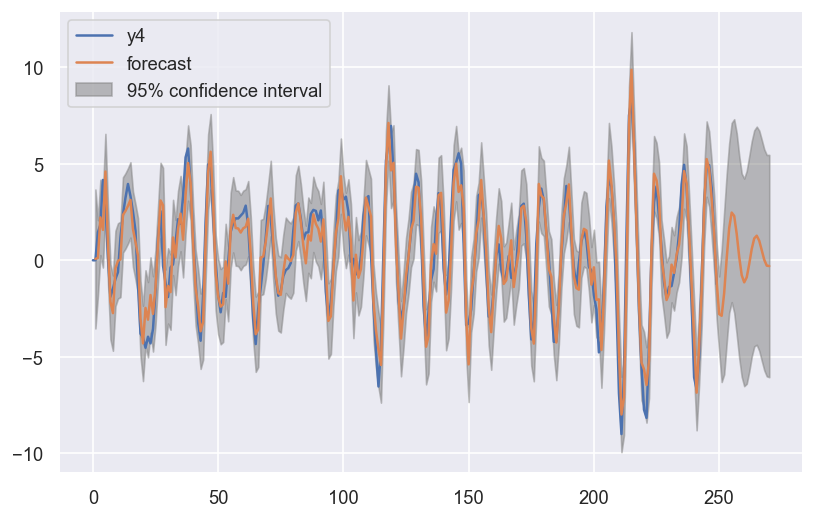

In [103]:
# Predict past and future values
horizon = 20
fig, ax = plt.subplots()
ax = df_ts4.loc[0:].plot(ax=ax)
fig = plot_predict(arima_fit4, 1, df_ts4.shape[0] + horizon, 
                    dynamic=False, ax=ax,
                    plot_insample=False)
plt.show()

# Y5

In [104]:
df_ts5 = df[['y5']] # Maintain data.frame format for column
df_ts5

,y5
0,0.000000
1,1.672241
2,-0.256682
3,-0.099479
4,-1.090444
...,...
245,-2.309011
246,0.416131
247,0.861696
248,0.929554


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


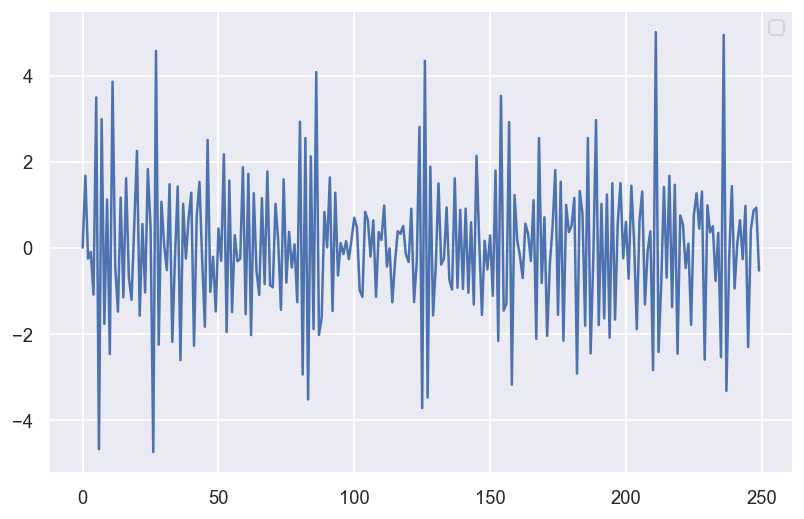

In [105]:
# Plotting a time series
plt.figure()
plt.plot(df_ts5)
ax.set(title='ARIMA time series data', ylabel='Value')
plt.legend()
plt.show()

/usr/local/Caskroom/miniforge/base/envs/fmad/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


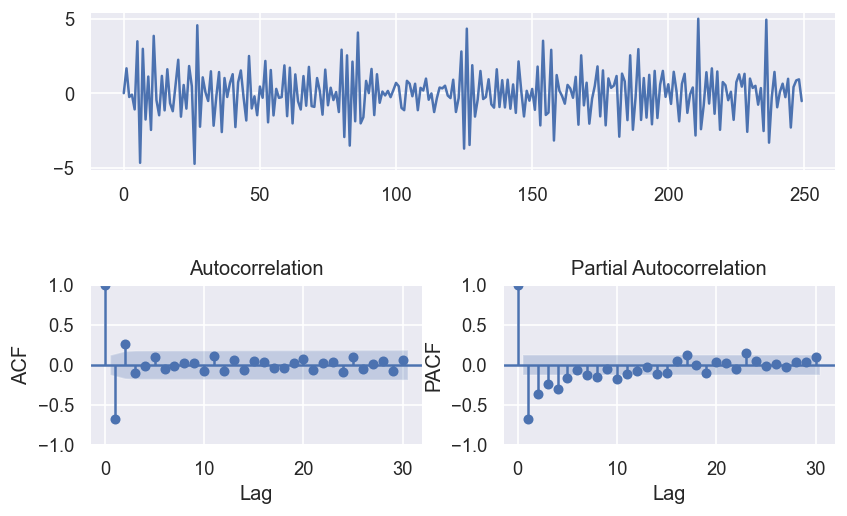

In [106]:
# ACF and PACF of the time series -> identify significant lags and order
FT.ts_display(df_ts5, lags=30)

In [114]:
# Fit model with estimated order
arima_fit5 = ARIMA(df_ts5, order=(0,0,2), trend="n").fit() #order=(p,d,q)
print(arima_fit5.summary())

                               SARIMAX Results                                
Dep. Variable:                     y5   No. Observations:                  250
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -356.820
Date:                Fri, 09 Dec 2022   AIC                            719.640
Time:                        17:35:26   BIC                            730.204
Sample:                             0   HQIC                           723.892
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1979      0.054    -22.033      0.000      -1.304      -1.091
ma.L2          0.2874      0.055      5.241      0.000       0.180       0.395
sigma2         1.0080      0.097     10.343      0.0

/usr/local/Caskroom/miniforge/base/envs/fmad/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Ljung-Box test of residuals:
      lb_stat  lb_pvalue
25  22.751664   0.592062


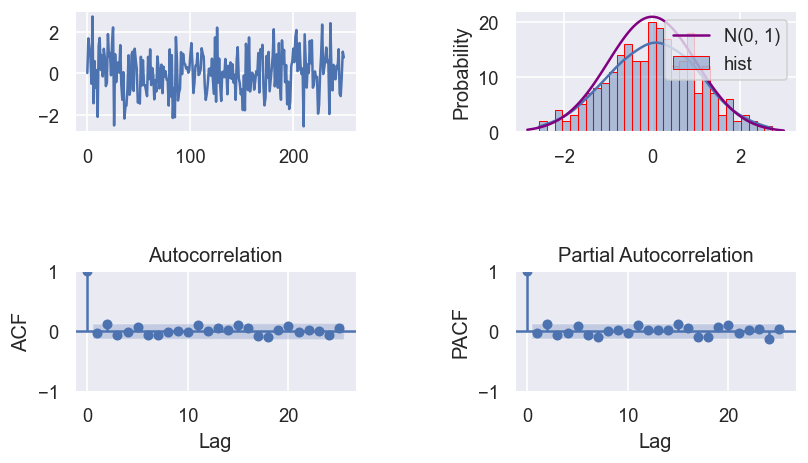

In [115]:
# Plot residual error
FT.check_residuals(pd.DataFrame(arima_fit5.resid))

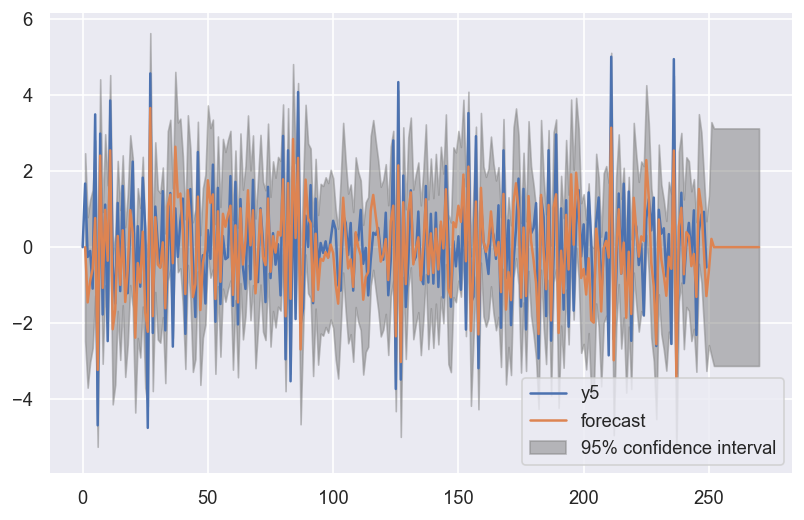

In [116]:
# Predict past and future values
horizon = 20
fig, ax = plt.subplots()
ax = df_ts5.loc[0:].plot(ax=ax)
fig = plot_predict(arima_fit5, 1, df_ts5.shape[0] + horizon, 
                    dynamic=False, ax=ax,
                    plot_insample=False)
plt.show()

# Y6

In [77]:
df_ts6 = df[['y6']] # Maintain data.frame format for column
df_ts6

,y6
0,0.000000
1,-0.491550
2,1.600353
3,-0.524670
4,0.319794
...,...
245,0.480343
246,-0.104227
247,-0.998492
248,0.430720


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


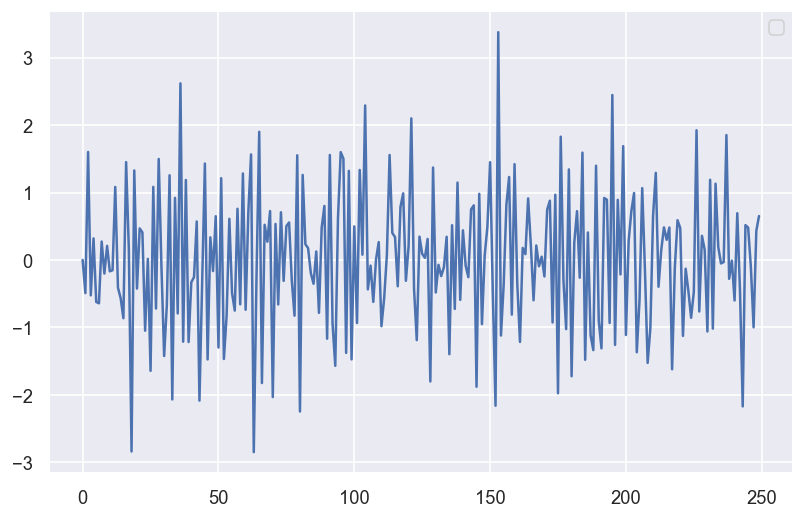

In [79]:
# Plotting a time series
plt.figure()
plt.plot(df_ts6)
ax.set(title='ARIMA time series data', ylabel='Value')
plt.legend()
plt.show()

/usr/local/Caskroom/miniforge/base/envs/fmad/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


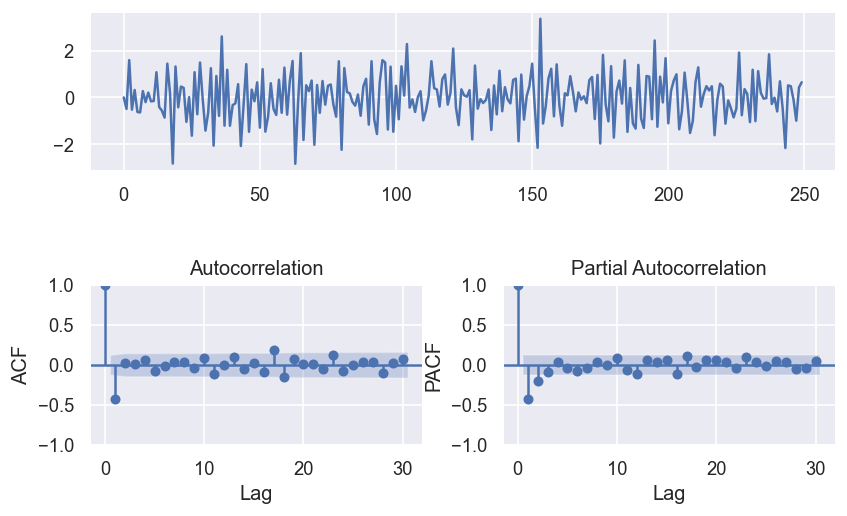

In [80]:
# ACF and PACF of the time series -> identify significant lags and order
FT.ts_display(df_ts6, lags=30)

In [91]:
# Fit model with estimated order
arima_fit6 = ARIMA(df_ts6, order=(0,0,1), trend="t").fit() #order=(p,d,q)
print(arima_fit6.summary())

                               SARIMAX Results                                
Dep. Variable:                     y6   No. Observations:                  250
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -333.024
Date:                Fri, 09 Dec 2022   AIC                            672.048
Time:                        17:29:53   BIC                            682.613
Sample:                             0   HQIC                           676.300
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001      0.000      0.607      0.544      -0.000       0.001
ma.L1         -0.5196      0.057     -9.095      0.000      -0.632      -0.408
sigma2         0.8317      0.072     11.545      0.0

/usr/local/Caskroom/miniforge/base/envs/fmad/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Ljung-Box test of residuals:
      lb_stat  lb_pvalue
25  47.561593   0.004207


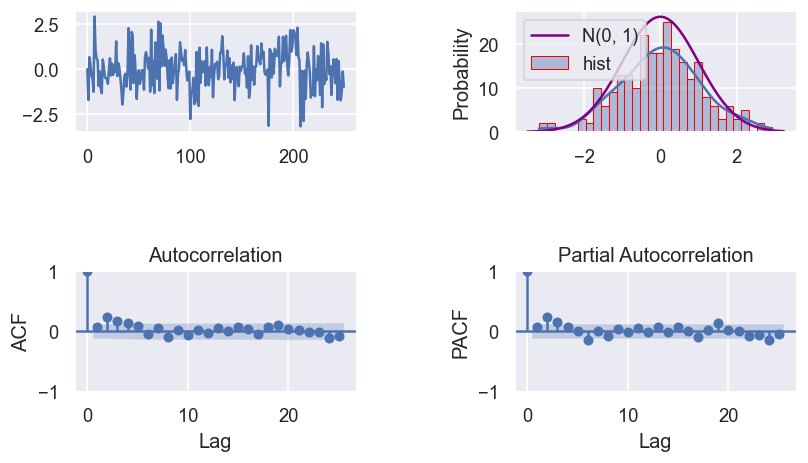

In [92]:
# Plot residual error
FT.check_residuals(pd.DataFrame(arima_fit.resid))

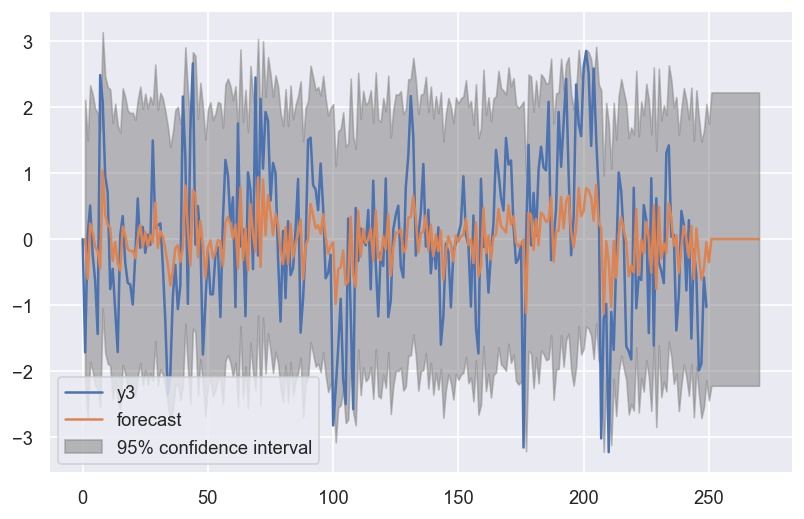

In [93]:
# Predict past and future values
horizon = 20
fig, ax = plt.subplots()
ax = df_ts.loc[0:].plot(ax=ax)
fig = plot_predict(arima_fit, 1, df_ts.shape[0] + horizon, 
                    dynamic=False, ax=ax,
                    plot_insample=False)
plt.show()